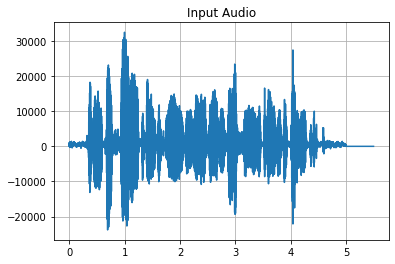

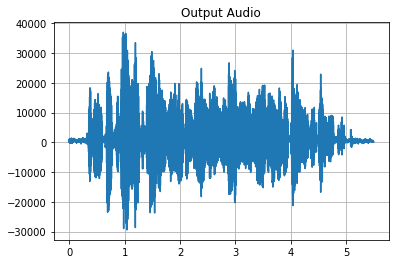

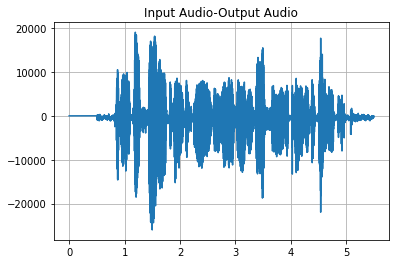

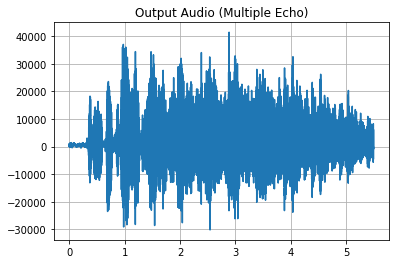

In [5]:
import numpy as np
import scipy.fftpack
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy.io import wavfile
plt.close("all")

fs, audio = wavfile.read('/content/Audio Effects System_speech_dft.wav') # Applying a real audio signal to the input and observing the results.

b=np.zeros(int(fs/2)+1) # Adds a 0.5 sec delay

audio=np.append(audio,b) # Adding zeros prevents the end of the file being truncated.

NN=len(audio)*1.0

t=np.arange(0,NN)/fs

plt.plot(t,audio)

plt.title ('Input Audio');
plt.grid()
plt.show()

b[0]=1
b[int(fs/2)]=0.8
a=1
audioOP=lfilter(b,a,audio)
plt.plot(t,audioOP)
plt.title ('Output Audio');
plt.grid()
plt.show()
diff=audio-audioOP
plt.plot(t,diff)
plt.title ('Input Audio-Output Audio');
plt.grid()
plt.show()

wavfile.write('c:\Temp\save_speech_dft.wav',fs,audio)
audioOP = np.asarray(audioOP, dtype=np.int16)
wavfile.write('c:\Temp\echo_speech_dft.wav',fs,audioOP)

N=6; R=int(fs/2)+1; alpha=0.8;
b=np.zeros(N*R+1);
b[N*R]=-alpha**N; b[0]=1;
a=np.zeros(R+1);
a[R]=-alpha; a[0]=1;
audioOP=lfilter(b,a,audio)
plt.plot(t,audioOP)
plt.title ('Output Audio (Multiple Echo)');
plt.grid()
plt.show()
audioOP = np.asarray(audioOP, dtype=np.int16)
wavfile.write('c:\Temp\mult_echo_speech_dft.wav',fs,audioOP)
# The code is a script that applies audio processing effects to an audio file in the form of a simple echo and multiple echoes.
# 1.Import libraries: The code imports the necessary libraries such as numpy, scipy, matplotlib, and scipy's wavfile library.

# 2.Read audio file: The code uses the wavfile library to read the audio file '/content/Audio Effects System_speech_dft.wav' and assigns the sample rate 'fs' and audio data 'audio'.

# Plot the original audio: The code plots the original audio using the matplotlib library and displays it with a title 'Input Audio'.

# Apply a simple echo: The code creates an array 'b' of zeros with a length of half the sample rate 'fs' and adds a 0.5-second delay to it. The original audio is then concatenated with the zeros in 'b'. The code uses the 'lfilter' function from the scipy signal library to apply the echo effect to the audio and assigns the result to 'audioOP'. The code then plots the output audio and displays it with a title 'Output Audio'.

# Plot the difference between input and output: The code calculates the difference between the input and output audio and plots it with a title 'Input Audio-Output Audio'.

# Write the audio to a file: The code writes the original and output audio to two different wav files 'save_speech_dft.wav' and 'echo_speech_dft.wav' respectively.

# Apply multiple echoes: The code sets the number of echoes 'N' to 6, the length of the zero array 'R' to half the sample rate 'fs', and the gain factor 'alpha' to 0.8. The code then creates two arrays 'b' and 'a' for the filter coefficients and uses the 'lfilter' function to apply the multiple echoes effect to the audio. The code then plots the output audio and displays it with a title 'Output Audio (Multiple Echo)'.

# Write multiple echoes to a file: The code writes the multiple echoes audio to a wav file 'mult_echo_speech_dft.wav'.